<a href="https://colab.research.google.com/github/DABallentine/knowledge_discovery_charlotte/blob/Dustin/EDA_and_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Charlotte 311 Service Request Analysis

<h1> <b> Exploratory Data Analysis and Preprocessing </b> </h1>

## Data Import and Survey

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
requests = pd.read_csv('/content/gdrive/MyDrive/Data/Service_Requests_311.csv')
requests.head()

,X,Y,OBJECTID,DEPARTMENT,DIVISION,REQUEST_NO,FISCAL_YEAR,FISCAL_MONTH,REQUEST_TYPE,RECEIVED_DATE,INTERNAL_FIELD_OBSERVATION,TITLE,CMPD_DIVISION,NEIGHBORHOOD_PROFILE_AREA,BLOCK_NO,STREET_DIRECTION,STREET_NAME,STREET_TYPE,CITY,STATE,ZIP_CODE,FULL_ADDRESS,X_COORD,Y_COORD,LATITUDE,LONGITUDE,COUNCIL_DISTRICT,GlobalID,PID,Shape
0,1.458251e+06,508075.000119,1,Solid Waste Services,Sanitation,6402056,2017,05-Nov,NON_RECYCLABLE ITEMS,2016/11/07 14:25:00+00,N,NON_RECYCLABLE ITEMS,NaN,215.0,3601.0,NaN,KNAPDALE,LN,CHARLOTTE,NC,28226.0,"3601 KNAPDALE LN, CHARLOTTE, NC 28226",1458251.0,508075.0,35.132444,-80.812089,NaN,{35439C7B-D8E4-4296-9119-8673B1D5A7C8},20904304,NaN
1,1.468687e+06,587225.999953,2,Housing and NBHD Serv,311 Partner Liaison,6402064,2017,05-Nov,UTILITY VERIFICATION LTR,2016/11/07 14:28:00+00,N,UTILITY VERIFICATION LTR,NaN,265.0,4124.0,NaN,SILVERMERE,WY,CHARLOTTE,NC,28269.0,"4124 SILVERMERE WY, CHARLOTTE, NC 28269",1468687.0,587226.0,35.350408,-80.781941,NaN,{3B4A2DC0-8886-4E8E-95E6-4F426C4E08E2},02731251,NaN
2,1.471481e+06,562512.999839,3,Solid Waste Services,Sanitation,6402082,2017,05-Nov,NON_RECYCLABLE ITEMS,2016/11/07 14:34:00+00,N,Non-recyclable Items,NaN,103.0,523.0,NaN,GRAHAM MEADOW,DR,CHARLOTTE,NC,28213.0,"523 GRAHAM MEADOW DR, CHARLOTTE, NC 28213",1471481.0,562513.0,35.282654,-80.771094,NaN,{C3E4CF76-7630-4356-8216-428445A0903F},08917486,NaN
3,1.438992e+06,568604.000124,4,Solid Waste Services,Sanitation,6402103,2017,05-Nov,MISSED RECYCLING,2016/11/07 14:41:00+00,N,MISSED RECYCLING,NaN,158.0,1801.0,NaN,CRANDON,DR,CHARLOTTE,NC,28216.0,"1801 CRANDON DR, CHARLOTTE, NC 28216",1438992.0,568604.0,35.297745,-80.880327,NaN,{FC3B4CD8-1131-42B4-A37E-8CA448855B24},03925515,NaN
4,NaN,NaN,5,Transit,Transit/Operations,6402111,2017,05-Nov,CITIZEN FEEDBACK,2016/11/07 14:44:00+00,N,CITIZEN FEEDBACK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{E0166346-2381-40E1-80A0-2ECA4FB6CB27},NaN,NaN


In [8]:
print("Records:", requests.shape[0])
print("Features:", requests.shape[1], "\n")
print(requests.info())

Records: 1631510
Features: 30 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1631510 entries, 0 to 1631509
Data columns (total 30 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   X                           1559084 non-null  float64
 1   Y                           1559084 non-null  float64
 2   OBJECTID                    1631510 non-null  int64  
 3   DEPARTMENT                  1631510 non-null  object 
 4   DIVISION                    1623095 non-null  object 
 5   REQUEST_NO                  1631510 non-null  int64  
 6   FISCAL_YEAR                 1631510 non-null  int64  
 7   FISCAL_MONTH                1631510 non-null  object 
 8   REQUEST_TYPE                1631510 non-null  object 
 9   RECEIVED_DATE               1631510 non-null  object 
 10  INTERNAL_FIELD_OBSERVATION  1631510 non-null  object 
 11  TITLE                       1631510 non-null  object 
 12  CMPD_DIVISION           

## Initial Variable Selection


<b> The following variables will be dropped: </b>
<ol>
<li> CMPD_DIVISION - too many missing values </li>
<li> STREET_DIRECTION - redundant </li>
<li> STREET_NAME - redundant </li>
<li> STREET_TYPE - redundant </li>
<li> CITY - redundant </li>
<li> STATE - redundant </li>
<li> COUNCIL_DISTRICT - too many missing values </li>
<li> GLOBAL_ID - no predictive value </li>
<li> PID - no predictive value </li>
<li> SHAPE - all missing </li>
</ol>

In [9]:
requests.drop(requests.iloc[:, [4,12,15,16,17,18,19,26,27,28,29]], axis=1, inplace=True)
requests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1631510 entries, 0 to 1631509
Data columns (total 19 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   X                           1559084 non-null  float64
 1   Y                           1559084 non-null  float64
 2   OBJECTID                    1631510 non-null  int64  
 3   DEPARTMENT                  1631510 non-null  object 
 4   REQUEST_NO                  1631510 non-null  int64  
 5   FISCAL_YEAR                 1631510 non-null  int64  
 6   FISCAL_MONTH                1631510 non-null  object 
 7   REQUEST_TYPE                1631510 non-null  object 
 8   RECEIVED_DATE               1631510 non-null  object 
 9   INTERNAL_FIELD_OBSERVATION  1631510 non-null  object 
 10  TITLE                       1631510 non-null  object 
 11  NEIGHBORHOOD_PROFILE_AREA   1559062 non-null  float64
 12  BLOCK_NO                    1587157 non-null  float64
 1

## Survey Request Types and Departments

In [10]:
print("Total unique request categories:", requests['REQUEST_TYPE'].unique().shape[0], "\n")
print("Top 30 categories by volume:\n")
print(requests['REQUEST_TYPE'].value_counts().head(30), "\n")

print("Top 30 departments by volume:\n")
print(requests['DEPARTMENT'].value_counts().head(30))

Total unique request categories: 165 

Top 30 categories by volume:

NON_RECYCLABLE ITEMS         831737
RECYCLABLE ITEMS             199452
HNS HEALTH AND SANITATION     85031
CART REPAIR-GARBAGE           36541
MISSED RECYCLING              27471
SW DOCUMENT GARBAGE           26729
311 DOCUMENT                  25395
CDOT STREETLIGHT REPAIR       19216
SW DOCUMENT RECYCLING         17932
DEAD ANIMAL COLLECTION        16727
CART ISSUE/MISSING CART       15121
TIRES                         13577
SW DOCUMENT YARD WASTE        13186
CART DELIVERY RECYCLING       11835
COMPLAINT                     11788
ZONING/COMPLAINT/ INSPECT     11767
CART(S) DEL- NEW BUILD        11324
CART ONLY DELIVER-GARB        11235
CART REPAIR-RECYCLE            9933
ZON GENERAL INFO  INQUIRY      9805
CDOT POTHOLE REPAIR            9416
HNS HOUSING                    8405
CART PURCHASE 2ND-GARBAGE      8077
MISSED GARBAGE                 7330
CDOT STREET SIGN REP/REPL      7260
PARKING ON LAWN WORKDAYS       

In [14]:
print("Bottom 50 categories by volume:\n")
print(requests['REQUEST_TYPE'].value_counts().tail(50).sort_values(ascending=True))

Bottom 50 categories by volume:

BUS STOP-REMOVE TRASH CAN      1
DISABILITY ACT                 1
UT/MANDATORY                   1
SW EXCESSIVE STORM-SW USE      1
ON CALL - SWS SPEC SERV        1
UT/LANDSCAPE                   1
SWS MLTFMLY FIELD OBSERVE      1
COMPLEX PROBLEM                1
SW FIELD OBSERVED TO CI        1
SW REMINDER BULKY-SW USE       2
SW REMINDER GARB-SW USE        4
NEW SVC BUSINESS GARBAGE       5
BUS STOP-TRASH CAN MISC        6
SW ESCALATION REQUEST          6
CART REPAIR-BUSN GARB          6
CART DELIVERY BUSN GARB        7
OPINION                        7
LAND DEVELOPMENT INQUIRY       8
BULKY ITEM SCHEDULE            8
BUS FACILITIES MAINT           8
SMOKING VEHICLE REPORT         9
UT RATE CHANGE                 9
MUD IN THE STREET             10
BUS STOP-FULL TRASH  CAN      10
CART ONLY DELIVER-RECY        10
PARK & REC REFUND/CANCEL      11
DISABLED INSPECTION (SWS)     12
SWS CART RETIRE REVIEW        12
ZON APPEALS/CITATIONS INQ     14
CWP REQUES

### Display all 311 request types alphabetically

In [43]:
# Set Display Options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Subset requests by unique values, sorted
A_CART = pd.Series(requests['REQUEST_TYPE'].unique()).sort_values()[0:25].reset_index()
CDOT_COM = pd.Series(requests['REQUEST_TYPE'].unique()).sort_values()[25:50].reset_index()
CON_INV = pd.Series(requests['REQUEST_TYPE'].unique()).sort_values()[50:75].reset_index()
INV_PAR = pd.Series(requests['REQUEST_TYPE'].unique()).sort_values()[75:100].reset_index()
PARK_SWDOC = pd.Series(requests['REQUEST_TYPE'].unique()).sort_values()[100:125].reset_index()
SWESC_ZON = pd.Series(requests['REQUEST_TYPE'].unique()).sort_values()[125:150].reset_index()
ZON_ZON = pd.Series(requests['REQUEST_TYPE'].unique()).sort_values()[150:165].reset_index()

# Combine those 7 Series of 25 values each into 1 data frame for convenient side-by-side display 
categories = pd.concat([A_CART, CDOT_COM, CON_INV, INV_PAR, PARK_SWDOC, SWESC_ZON, ZON_ZON], axis=1)
categories.drop(categories.iloc[:,[0,2,4,6,8,10,12]], axis=1, inplace=True) # drop the index columns
categories.columns = ['A-CART', 'CDOT-COM', 'CON-INV', 'INV-PAR', 'PARK-SWDOC', 'SWESC-ZON', 'ZON-ZON']
categories.reset_index(drop=True)
categories = categories.style.set_properties(**{'text-align': 'left'}) # left justify for easy comparison of topics to determine possible bins / combinations
categories

,A-CART,CDOT-COM,CON-INV,INV-PAR,PARK-SWDOC,SWESC-ZON,ZON-ZON
0,3-1-1 ESCALATION REQUEST,CDOT BASKETBALL,CONTENT IMPROVEMENT PROG,INVESTIGATE/CONTACT GARB,PARKING ON LAWN OFFHOURS,SW ESCALATION REQUEST,ZON GENERAL INFO INQUIRY
1,311 DOCUMENT,CDOT CLEAN CATCH BASIN,COVID 19-PRICE GOUGING,INVESTIGATE/CONTACT RECY,PARKING ON LAWN WORKDAYS,SW EXCESSIVE STORM-SW USE,ZON HOLDS RELEASE REQUEST
2,ADOPT-A PICKUP SWS,CDOT FLOODING,COVID 19-PUBLIC GATHERING,INVESTIGATE/CONTACT YD WT,PLANNING INQUIRY,SW FIELD OBSERVED TO CI,ZON RESIDENTIAL PERMITS
3,ANIMAL FOUND REPORT,CDOT GRATE DAMAGE/REPLACE,COVID 19-STAY HOME VIOL,LAND DEVELOPMENT INQUIRY,POLLUTION,SW ONLY-DOOR HANGER LEFT,ZON SETBACKS
4,BLOCKAGE,CDOT GUARD RAIL,CURRENT DISABLED SERVICE,LANDSCAPE LIMBS,RECYCLABLE ITEMS,SW REMINDER BULKY-SW USE,ZON SIGNS INQUIRY
5,BOARDED UP STRUCTURE,CDOT MISCELLANEOUS,CWP REQUEST,LANDSCAPE TREES,REQUEST DISABILITY FORM,SW REMINDER GARB-SW USE,ZON STORAGE BLDG/ACC UNIT
6,BULKY ITEM SCHEDULE,CDOT NEW CROSSWALK,CWP REQUEST-HIGH PRIORITY,LITTER/DEBRIS IN STREET,REQUEST FOR SPEAKER,SW REMINDER RECY-SW USE,ZON SUBDIVIDE PROP/DUPLX
7,BUS FACILITIES MAINT,CDOT NEW SIDEWALK,DAMAGE/INVESTIGATE BULKY,MISSED BULKY ITEM,SIDEWALK OBSTR CONTAINERS,SW REMINDER YARD-SW USE,ZON SUPERVISORY COMPLAINT
8,BUS STOP-FULL TRASH CAN,CDOT NEW SIGN,DAMAGE/INVESTIGATE GARB,MISSED BUSINESS GARBAGE,SIDEWALK OBSTRUCT OTHER,SWAT-A-LITTERBUG,ZON VERIFICATION LETTERS
9,BUS STOP-REMOVE TRASH CAN,CDOT NEW STREETLIGHTS,DAMAGE/INVESTIGATE RECY,MISSED GARBAGE,SIGNS (NOT FOR 311 USE),SWS CART DATA LOAD,ZON WATERSHED/SWPE INQ


## Decisions on selection and binning:

- We will want to retain the option to use all categories and compare that to the performance of our analyses when using self-determined bins.

- Binning roughly around general categories--for example all CART-related requests into one category, cleanliness-related requests such as trash in the street and pollution into one category--we can encode a new column with only 40 categories.

- After binning, any categories with fewer than 30 records are dropped.

- We also eliminate several Solid Waste Services administrative categories, such as data loads, as well as three COVID-19-related categories, which we choose to exclude from this analysis.


## Customers with the highest number of requests

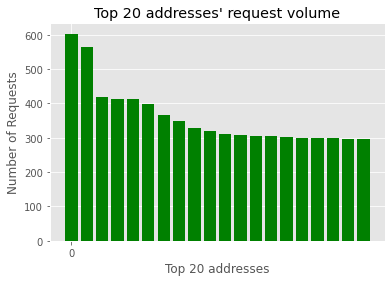

In [40]:
# Using address as "customer"
address_ranks = requests['FULL_ADDRESS'].value_counts().head(20)

x_pos = [i for i, _ in enumerate(address_ranks[[0]])]
x = range(20)
y = address_ranks
plt.bar(x, y, color='green')
plt.xlabel("Top 20 addresses")
plt.ylabel("Number of Requests")
plt.title("Top 20 addresses' request volume")

plt.xticks(x_pos, x)

plt.show()

In [ ]:
# Combining LATTITUDE and LONGITUDE to create unique location IDs accurate to 1.11m to define as "customer"
requests['LATLON'] = requests["LATITUDE"].astype(str) + requests["LONGITUDE"].astype(str)
# Rank customers by frequency of requests
customer_ranks = requests['LATLON'].value_counts().to_frame().reset_index()
customer_ranks.columns = ['LATLON', 'Number of Calls'] # change column names
top_20 = customer_ranks[0:20]
top_20

,LATLON,Number of Calls
0,nannan,72433
1,35.26671306-80.76104322,758
2,35.12039601-80.86962228,563
3,35.23909427-80.92592474,356
4,35.25927032-80.90078488,344
5,35.26391476-80.73330321,320
6,35.26371343-80.88607182,320
7,35.14960744-80.88478039,312
8,35.22968575-80.74488978,309
9,35.19929285-80.76009595,306


## Frequency of Requests Over Time

In [48]:
requests['RECEIVED_DATE'] = pd.to_datetime(requests['RECEIVED_DATE'], format='%Y/%m/%d %H:%M')
requests['RECEIVED_DATE'].head()

0   2016-11-07 14:25:00+00:00
1   2016-11-07 14:28:00+00:00
2   2016-11-07 14:34:00+00:00
3   2016-11-07 14:41:00+00:00
4   2016-11-07 14:44:00+00:00
Name: RECEIVED_DATE, dtype: datetime64[ns, UTC]

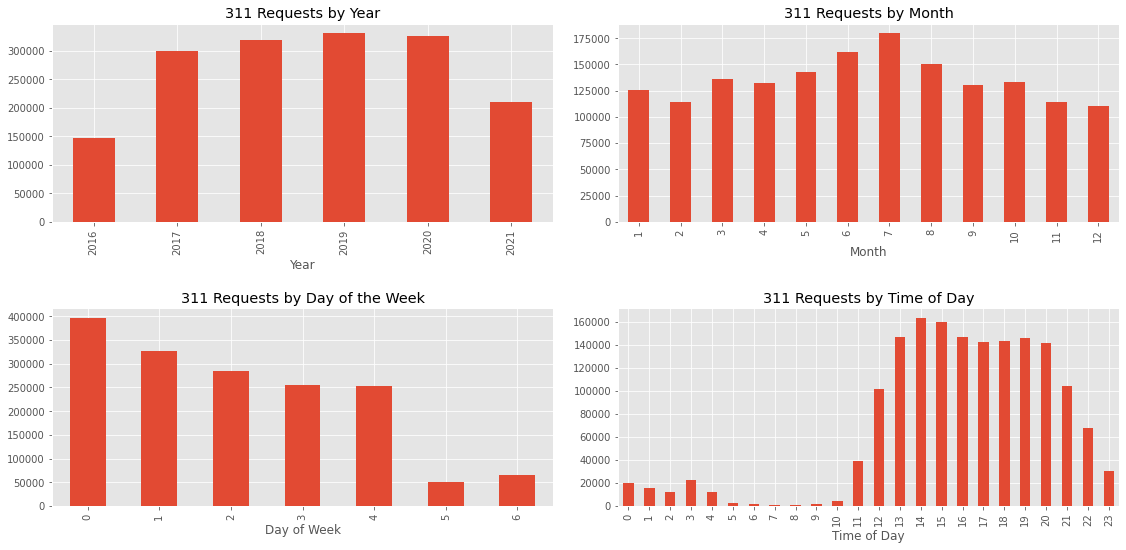

In [65]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
requests.groupby(requests['RECEIVED_DATE'].rename('Year').dt.year).size().plot.bar()
plt.title("311 Requests by Year")
plt.subplot(2,2,2)
requests.groupby(requests['RECEIVED_DATE'].rename('Month').dt.month).size().plot.bar()
plt.title("311 Requests by Month")
plt.subplot(2,2,3)
requests.groupby(requests['RECEIVED_DATE'].rename('Day of Week').dt.dayofweek).size().plot.bar()
plt.title("311 Requests by Day of the Week")
plt.subplot(2,2,4)
requests.groupby(requests['RECEIVED_DATE'].rename('Time of Day').dt.hour).size().plot.bar()
plt.title("311 Requests by Time of Day")
plt.tight_layout(pad=2.0)

<h2> Data Preprocessing </h2>

<h2> Data Understanding and Exploration </h2>

<h2> Data Preparation for Modeling </h2>

<h2> Modeling </h2>

<h2> Evaluation </h2>

<h2> Results </h2>